In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## This notebook creates box plots of select predictors used in the random forest classifier (Fig. 5). Separation of EML and non EML cases highlight differences in the distributions of these variables.  

#### EML_May_2012_2021.csv contains 10 years (2012-2021) of EML data for the month of May only. Data are 6-hourly (0, 6, 12, 18 UTC).
 - 'eml' variable is binary, where 1=EML, 0=no EML. This is the variable we are trying to predict.
 - latitude, longitude, and time variables indicate when and where there is or isn't an EML.
 - all other variables are possible predictors for our ML model

In [2]:
# Open the CSV file containing the May 2012-2021 EML dataset
df = pd.read_csv('/home/scratch/mandrews/eae_598/EML_May_2012_2021.csv')
df.head()

,latitude,longitude,time,Z500,t500,wspd500,wdir500,mucape,mucin,mlcape,...,theta_850,theta_925,theta_sfc,t925,rh_sfc,rh_925,rh_850,rh_700,rh_500,rh_3_6km
0,26.0,253.00,2012-05-01 00:00:00,5.843171,-9.134342,5.660553,205.892493,0.0,0.0,0.0,...,NaN,NaN,313.883362,NaN,0.267810,NaN,NaN,0.448221,0.275484,0.199151
1,26.0,253.25,2012-05-01 00:00:00,5.843966,-9.297320,5.074431,202.685653,0.0,0.0,0.0,...,NaN,NaN,315.494537,NaN,0.253985,NaN,NaN,0.365675,0.325275,0.236668
2,26.0,253.50,2012-05-01 00:00:00,5.844372,-9.441615,5.426132,192.996072,0.0,0.0,0.0,...,NaN,NaN,316.565155,NaN,0.233949,NaN,NaN,0.309428,0.276469,0.241000
3,26.0,253.75,2012-05-01 00:00:00,5.846489,-9.879836,4.917766,180.679988,0.0,0.0,0.0,...,NaN,NaN,317.429565,NaN,0.219240,NaN,NaN,0.280152,0.366142,0.259380
4,26.0,254.00,2012-05-01 00:00:00,5.847194,-10.555432,3.565028,182.630536,0.0,0.0,0.0,...,NaN,NaN,318.495514,NaN,0.158403,NaN,NaN,0.231137,0.591805,0.389781


In [3]:
# This seperates the date column to get a new year column
df['year'] = [int(x.split('-')[0]) for x in df['time']]

# This seperates the date column to get a new hour column
df['hour'] = [str(x.split(' ')[1])[0:2] for x in df['time']]

# Change variable types to integers to make plotting easier
df['eml'] = df['eml'].astype(int)
df['hour'] = df['hour'].astype(int)

In [4]:
# Select all the EML cases in the dataset
emls = df[df['eml'] == 1]

# Select all the not EML cases in the dataset
no_emls = df[df['eml'] == 0]

In [5]:
# Assign labels to each row based on the 'eml' column
label_names = ['no EML', 'EML']
df['label_name'] = [label_names[x] for x in df.eml.values]

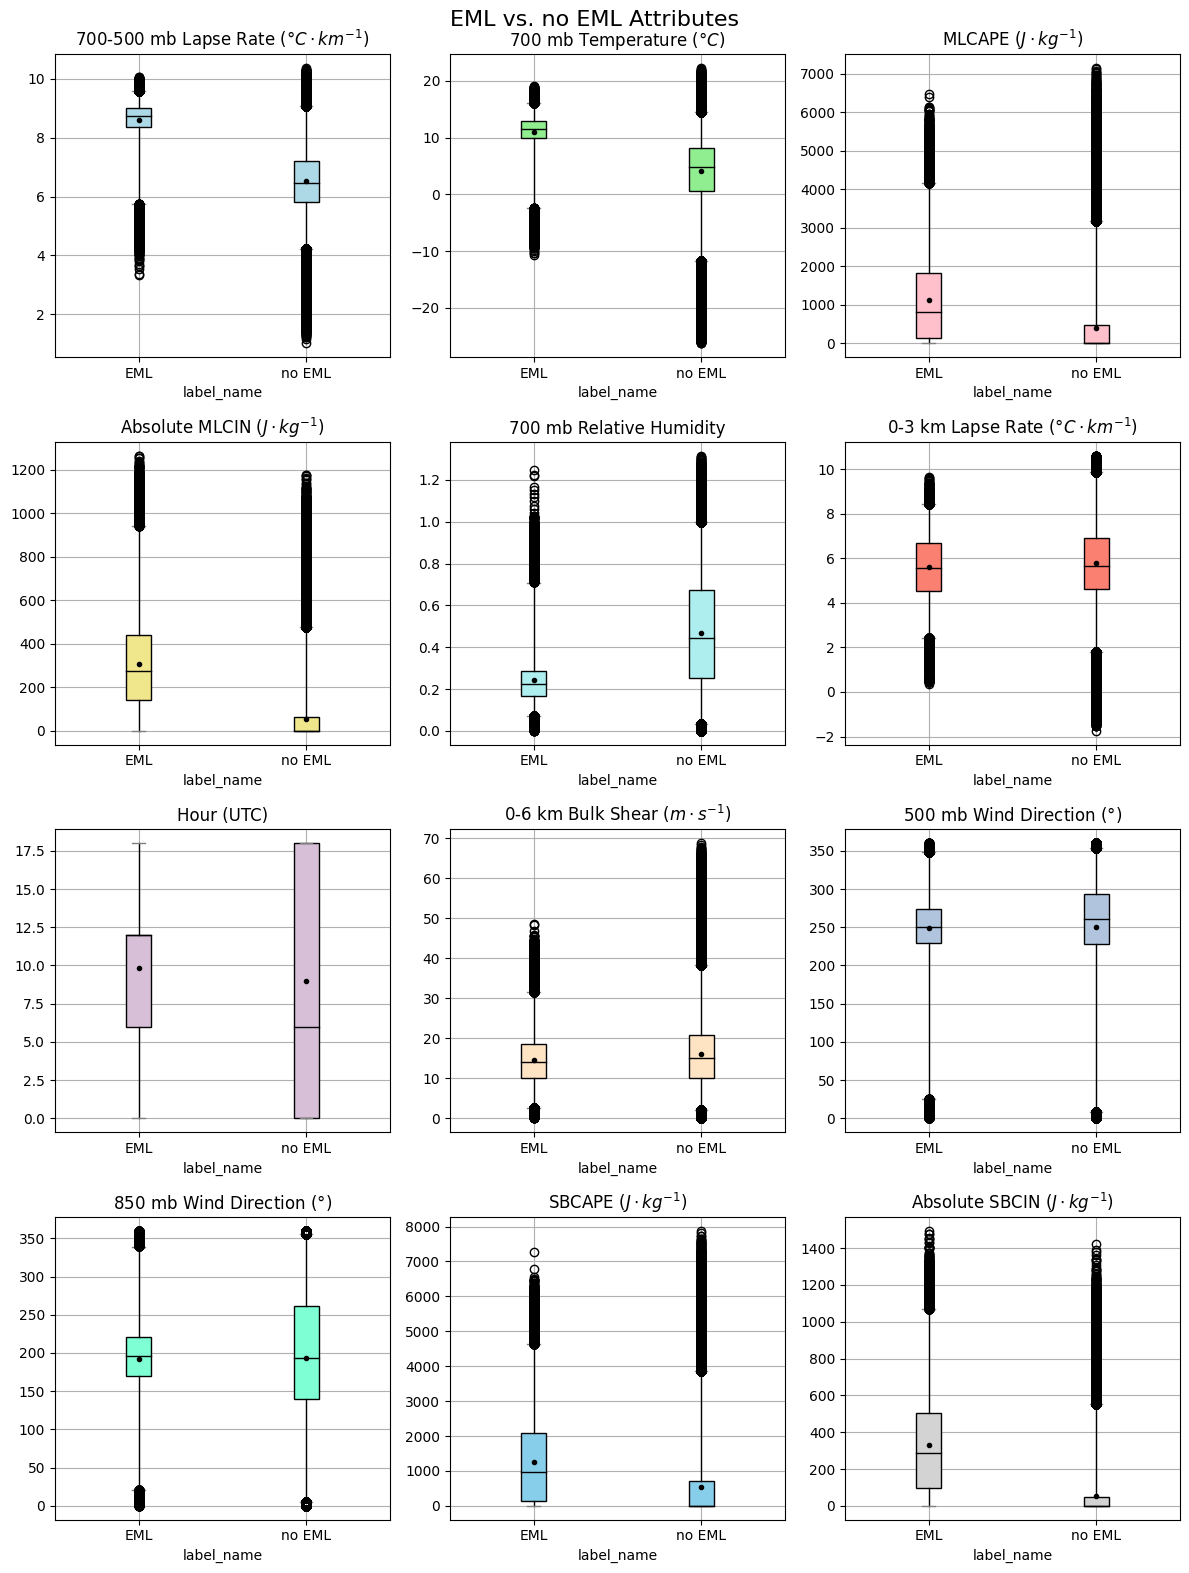

In [6]:
# Create box plots comparing EML attributes to attributes of vertical profiles without an EML
fig, axes = plt.subplots(4, 3, figsize=(12, 16))
meanpointprops = dict(marker='.', markeredgecolor='black', markerfacecolor='black') 
props = dict(boxes="pink", whiskers="black", medians="black", caps="Gray")

ax = df.boxplot(column='lr75', by='label_name', whis=[1, 99], ax=axes[0,0], color=props, boxprops=dict(edgecolor="black", facecolor="lightblue"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax.set_title('700-500 mb Lapse Rate ($\degree C \cdot km^{-1}$)')

ax1 = df.boxplot(column='t700', by='label_name', whis=[1, 99], ax=axes[0,1], color=props, boxprops=dict(edgecolor="black", facecolor="lightgreen"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax1.set_title('700 mb Temperature ($\degree C$)')

ax2 = df.boxplot(column='mlcape', by='label_name', whis=[1, 99], ax=axes[0,2], color=props, boxprops=dict(edgecolor="black", facecolor="pink"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax2.set_title('MLCAPE ($J \cdot kg^{-1}$)')

ax3 = df.boxplot(column='mlcin', by='label_name', whis=[1, 99], ax=axes[1,0], color=props, boxprops=dict(edgecolor="black", facecolor="khaki"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax3.set_title('Absolute MLCIN ($J \cdot kg^{-1}$)')

ax4 = df.boxplot(column='rh_700', by='label_name', whis=[1, 99], ax=axes[1,1], color=props, boxprops=dict(edgecolor="black", facecolor="paleturquoise"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax4.set_title('700 mb Relative Humidity')

ax5 = df.boxplot(column='lr03', by='label_name', whis=[1, 99], ax=axes[1,2], color=props, boxprops=dict(edgecolor="black", facecolor="salmon"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax5.set_title('0-3 km Lapse Rate ($\degree C \cdot km^{-1}$)')

ax6 = df.boxplot(column='hour', by='label_name', whis=[1, 99], ax=axes[2,0], color=props, boxprops=dict(edgecolor="black", facecolor="thistle"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax6.set_title('Hour (UTC)')

ax7 = df.boxplot(column='bs06', by='label_name', whis=[1, 99], ax=axes[2,1], color=props, boxprops=dict(edgecolor="black", facecolor="bisque"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax7.set_title('0-6 km Bulk Shear ($m \cdot s^{-1}$)')

ax8 = df.boxplot(column='wdir500', by='label_name', whis=[1, 99], ax=axes[2,2], color=props, boxprops=dict(edgecolor="black", facecolor="lightsteelblue"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax8.set_title('500 mb Wind Direction ($\degree$)')

ax6 = df.boxplot(column='wdir850', by='label_name', whis=[1, 99], ax=axes[3,0], color=props, boxprops=dict(edgecolor="black", facecolor="aquamarine"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax6.set_title('850 mb Wind Direction ($\degree$)')

ax7 = df.boxplot(column='sbcape', by='label_name', whis=[1, 99], ax=axes[3,1], color=props, boxprops=dict(edgecolor="black", facecolor="skyblue"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax7.set_title('SBCAPE ($J \cdot kg^{-1}$)')

ax8 = df.boxplot(column='sbcin', by='label_name', whis=[1, 99], ax=axes[3,2], color=props, boxprops=dict(edgecolor="black", facecolor="lightgrey"), patch_artist=True, showmeans=True, meanprops=meanpointprops)
ax8.set_title('Absolute SBCIN ($J \cdot kg^{-1}$)')

ax.get_figure().suptitle('EML vs. no EML Attributes', fontsize=16)

plt.tight_layout()
plt.show()